# Bank Customer Churn Prediction
In this kernel I am going to make an __Exploratory Data Analysis (EDA)__ on [this](https://www.kaggle.com/filippoo/deep-learning-az-ann) dataset. Also I am going to make different predictive models and find out the best one with highest prediction accuracy. 

### Kernel Outlines:
* __Importing Necessary Packages__
* __Statistical Summary of the Dataset__
* __Dropping Irrelevant Features__
* __One Hot Encoding__
* __Data Visualization__
* __Detecting Outliers using Tukey Boxplot__
* __Checking Correlation with Heatmap__
* __Feature Scaling__
* __Different ML predictive models__
    * Gaussian Naive Bayes
    * Logistic Regression
    * Decision Tree
    * Random Forest
    * Extra Gradient Boosting Tree (XGBoost)
* __Improve the Predictive Model__
    * Over Sampling

### Importing Necessary Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(palette="Set2")

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

In [3]:
# read dataset
dataset = pd.read_csv("Churn_Modeling.csv")

In [4]:
# first five row of the dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### __The statistical summary of the dataset__

In [5]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# checking datatypes and null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Dropping Irrelevant Feature
**'RowNumber'**, **'CustomerId'** and **'Surname'** are irrelivant, so we drop those features.

In [7]:
dataset.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

## Data Visualization 

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

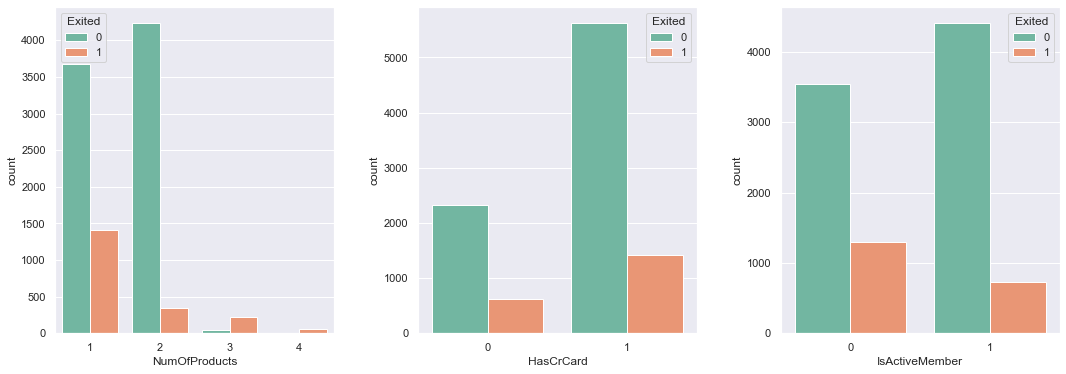

In [8]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = dataset, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = dataset, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = dataset, ax = ax[2])

**Customer with 3 or 4 products have higher chances to Churn.**

**Inactive customers also have greater chances of churn.**

<AxesSubplot:xlabel='IsActiveMember', ylabel='Age'>

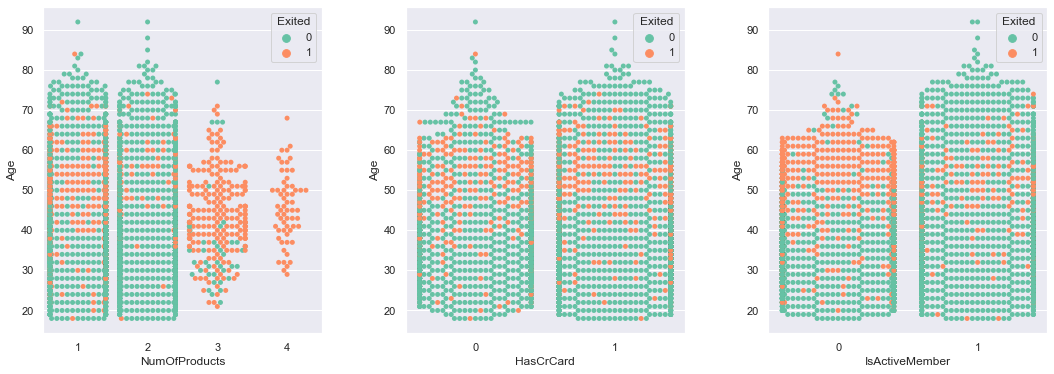

In [9]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = dataset, ax= ax[0])
sns.swarmplot(x = "HasCrCard", y = "Age", data = dataset, hue="Exited", ax = ax[1])
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = dataset, ax = ax[2])

**As can be seen from above swarmplots:**

-Customers with 3 or more products have high chances of churn.

-No relation can be seen with churn of customer having credit card or not.

-Inactive older age customers have very high chances of churn.

In [10]:
encoder = LabelEncoder()
dataset["Geography"] = encoder.fit_transform(dataset["Geography"])
dataset["Gender"] = encoder.fit_transform(dataset["Gender"])

<AxesSubplot:>

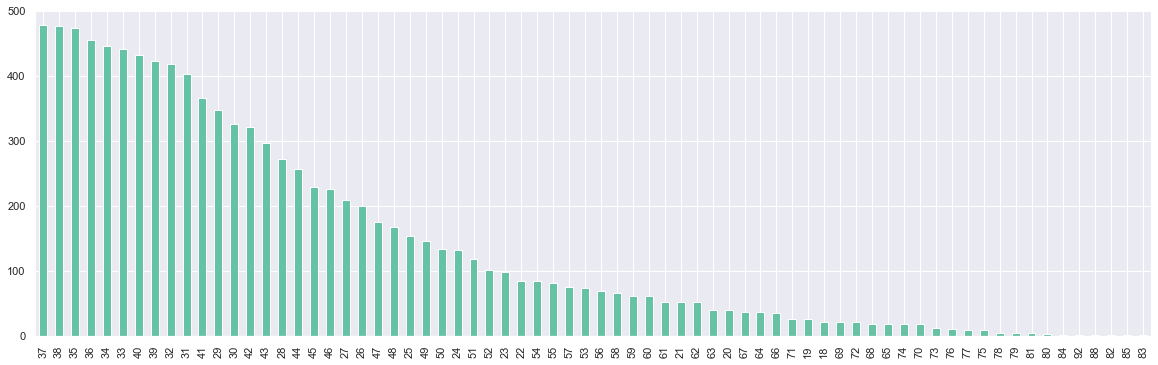

In [11]:
dataset["Age"].value_counts().plot.bar(figsize=(20,6))

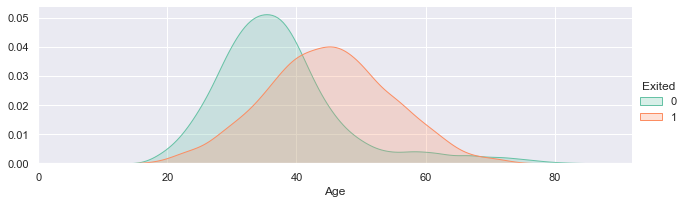

In [12]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, dataset["Age"].max()))
facet.add_legend()

plt.show()

**Above distribution shows older age customers have high chances of churn.**

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

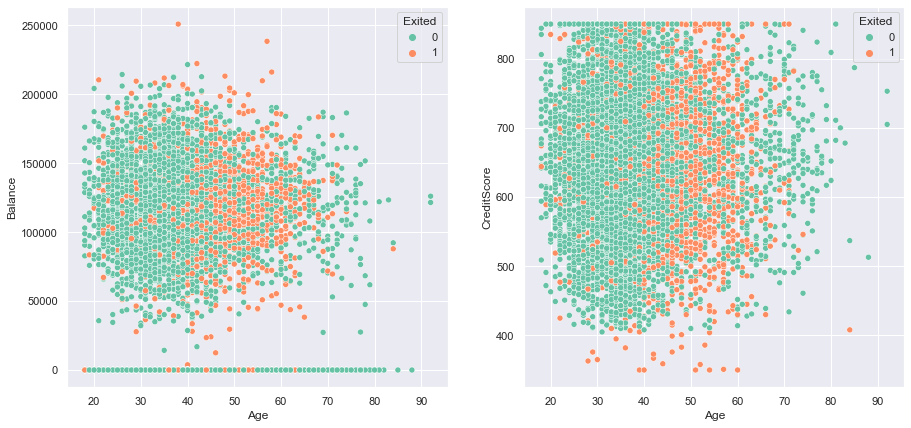

In [13]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[1])

* __40 to 70 years old customers are higher chances to churn__
* __Customer with `CreditScore` less then `400` are higher chances to churn__

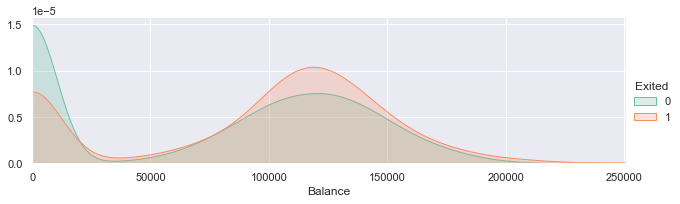

In [14]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, dataset["Balance"].max()))
facet.add_legend()

plt.show()

<AxesSubplot:xlabel='Balance', ylabel='CreditScore'>

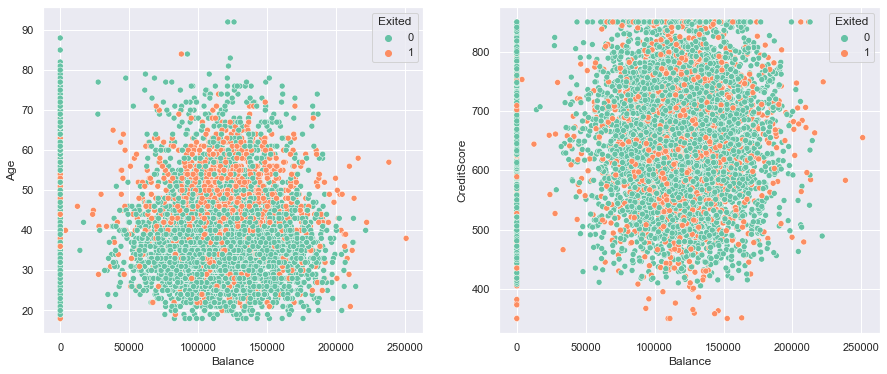

In [15]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = dataset, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = dataset, hue="Exited", ax = ax[1])

__No inference can be made regarding customer's balance having any influence on churn.__

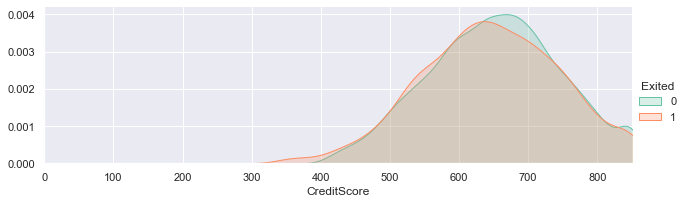

In [16]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, dataset["CreditScore"].max()))
facet.add_legend()

plt.show()

### __Detecting Outliers using Tukey Boxplot__

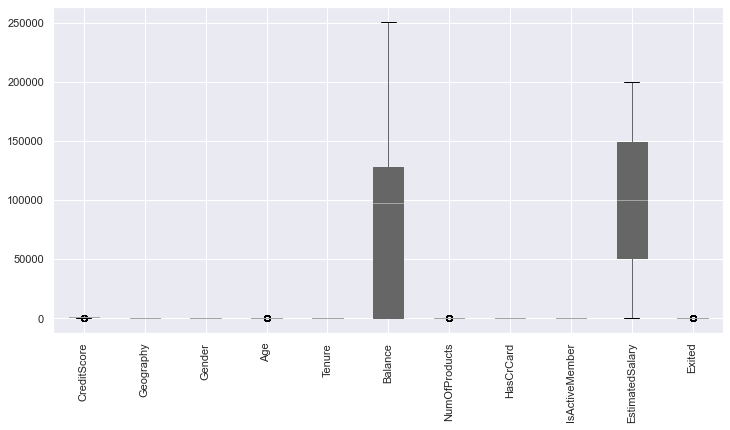

In [17]:
plt.figure(figsize=(12,6))
bplot = dataset.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

### __Checking Correlation__

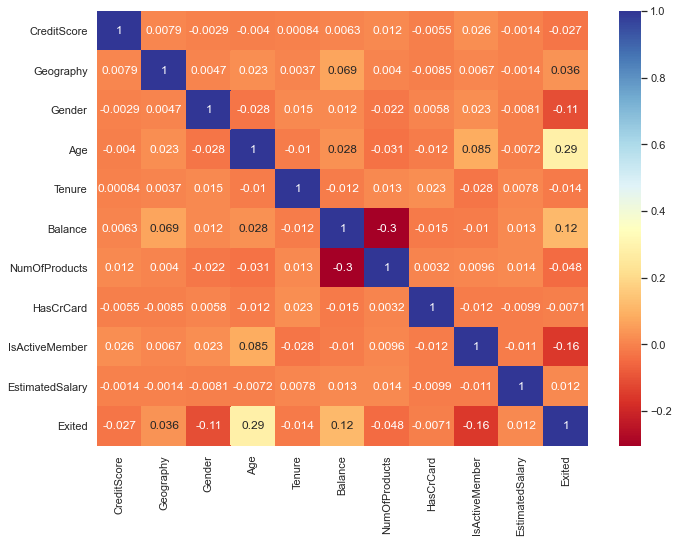

In [18]:
plt.subplots(figsize=(11,8))
sns.heatmap(dataset.corr(), annot=True, cmap="RdYlBu")
plt.show()

## Feature Scaling:

In [19]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(data = dataset)
df_scaled[:] = scaler.fit_transform(dataset[:])

In [20]:
df_scaled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


## Prediction with ML models:

In [21]:
X = df_scaled.drop("Exited", axis=1)
y = df_scaled["Exited"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

In [23]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.823
Precision: 0.6962962962962963
Recall: 0.23095823095823095
F1: 0.34686346863468637
Area under precision (AUC) Recall: 0.3173153608153608


In [24]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l1','l2'],
             'solver':['lbfgs']}

In [25]:
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr,parameters, cv=10)
logreg_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8071249999999999


In [26]:
y_pred = logreg_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.804
Precision: 0.5590551181102362
Recall: 0.17444717444717445
F1: 0.26591760299625467
Area under precision (AUC) Recall: 0.2655255857145621


In [27]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [28]:
clf = tree.DecisionTreeClassifier()
clf_cv=GridSearchCV(clf,parameters, cv=10)
clf_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
print("accuracy :",clf_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8494999999999999


In [29]:
y_pred = clf_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.8485
Precision: 0.7385321100917431
Recall: 0.3955773955773956
F1: 0.5152
Area under precision (AUC) Recall: 0.4151466086603701


In [30]:
parameters={'n_estimators': [100,200,300,500]}

In [31]:
clf = RandomForestClassifier(criterion='gini', max_depth= 18, max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, random_state=200)
clf_cv=GridSearchCV(clf,parameters, cv=10)
clf_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
print("accuracy :",clf_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_estimators': 200}
accuracy : 0.8625


In [32]:
y_pred = clf_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.8585
Precision: 0.7540983606557377
Recall: 0.4520884520884521
F1: 0.5652841781874041
Area under precision (AUC) Recall: 0.4524191605912917


In [33]:
clf = XGBClassifier(max_depth = 10,random_state = 10,n_estimators=100, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.75,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, ...)

In [34]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.8445
Precision: 0.6751824817518248
Recall: 0.45454545454545453
F1: 0.5433186490455212
Area under precision (AUC) Recall: 0.41790112806901125


### Over Sampling

In [35]:
sm  = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [46]:
clf = RandomForestClassifier(criterion='gini', max_depth= 18,n_estimators=100, max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2, random_state=200)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.8385
Precision: 0.6060606060606061
Recall: 0.5896805896805897
F1: 0.5977584059775841
Area under precision (AUC) Recall: 0.4408821755639938


In [37]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[1434,  159],
       [ 170,  237]], dtype=int64)

In [38]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Exited', 'Did not Exit']); ax.yaxis.set_ticklabels(['Exited', 'Did not Exit'])

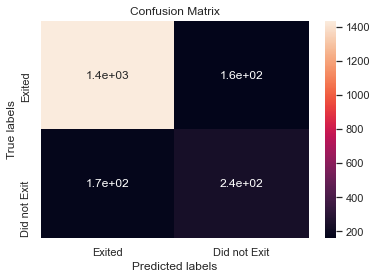

In [39]:
plot_confusion_matrix(y_test,y_pred)